### 상관관계가 높은 변수쌍 찾기

#### DataSet : mtcars - R 기본 내장
- Motor Trend Car Road Test
- Motor Trend 잡지로 부터 추출된 자료
- 1973~1974년도 각기 종류가 다른 32대의 자동차 자료
- mpg(Miles/gallon) : 연비
- cyl(Number of cylinders) : 실린더 수
- disp(Displacement) : 배기량
- hp(Gross horsepower) : 마력
- drat(Rear axle ratio) : 후방 차축 비율
- wt(Weight) : 차체 무게
- qsec (1/4 mile time) : 400m 까기 걸리는 시간
- vs(V/S)
- am (Transmission 0 = auto, 1 = manual)
- gear (Number of forward gears) : 전진장치 개수
- carb (Number of carburetors) : 기화기 수

In [1]:
df <- mtcars
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
str(df)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


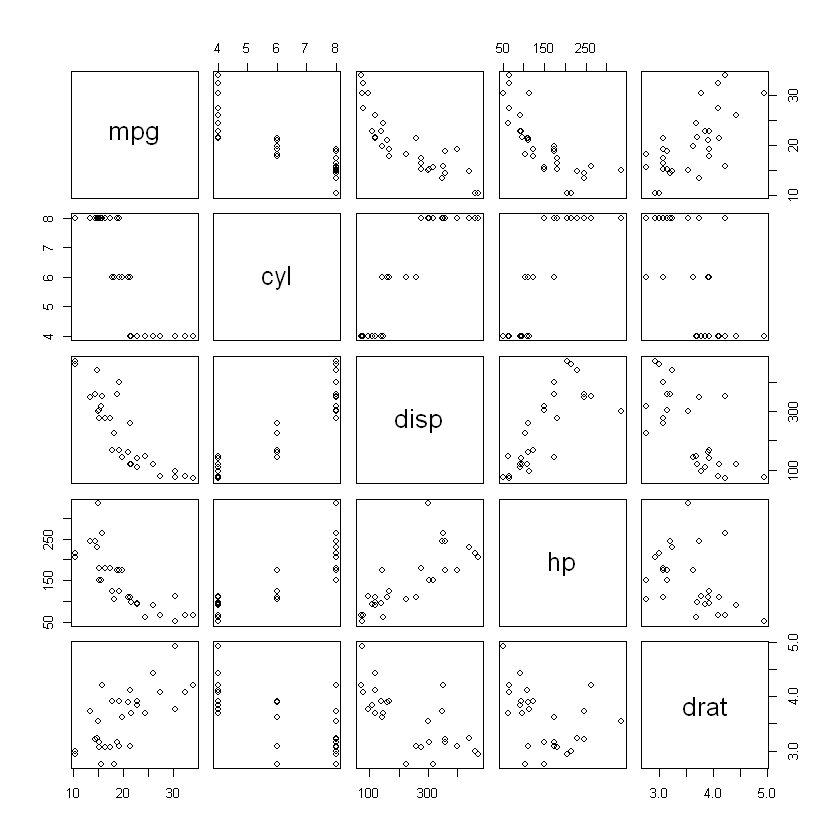

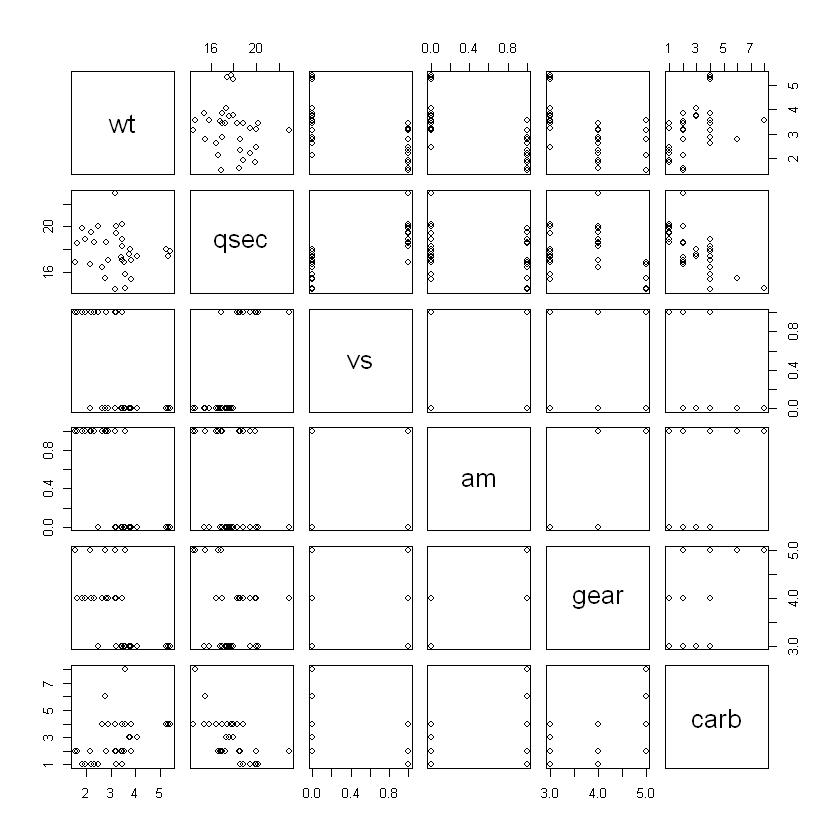

In [4]:
plot(df[,c(1:5)])
plot(df[,c(6:11)])

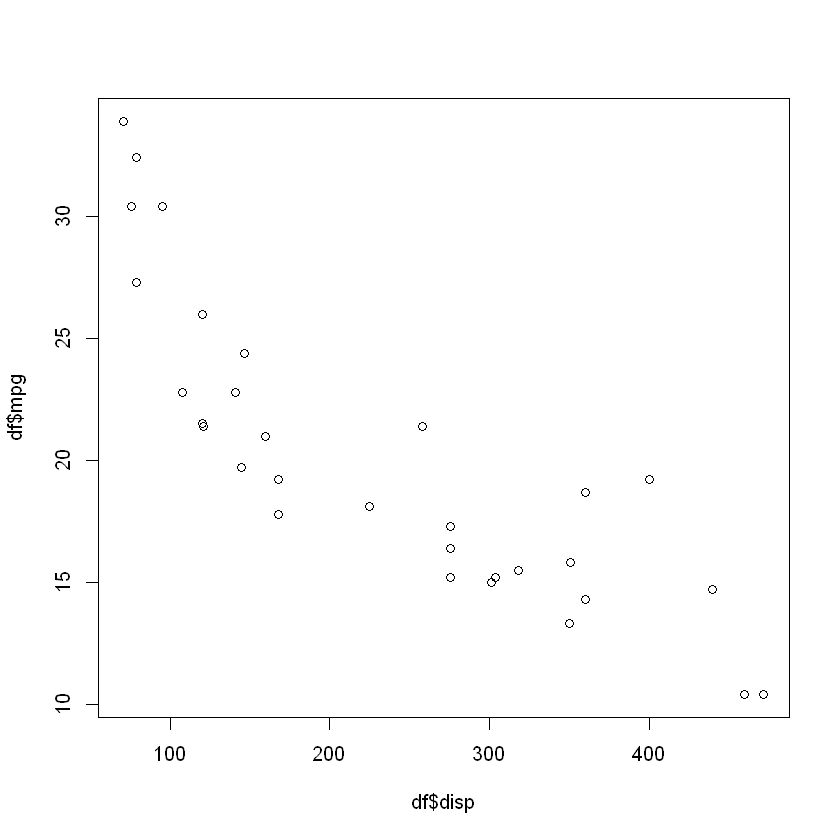

In [5]:
plot(df$mpg ~ df$disp)  #앞쪽이y 뒤가x

In [6]:
# 상관 계수 (-1 < 0 < 1) 0일수록 상관없고 음의상관관계와 양의 상관관계
cor(df$mpg,df$disp)

[1] -0.8475514

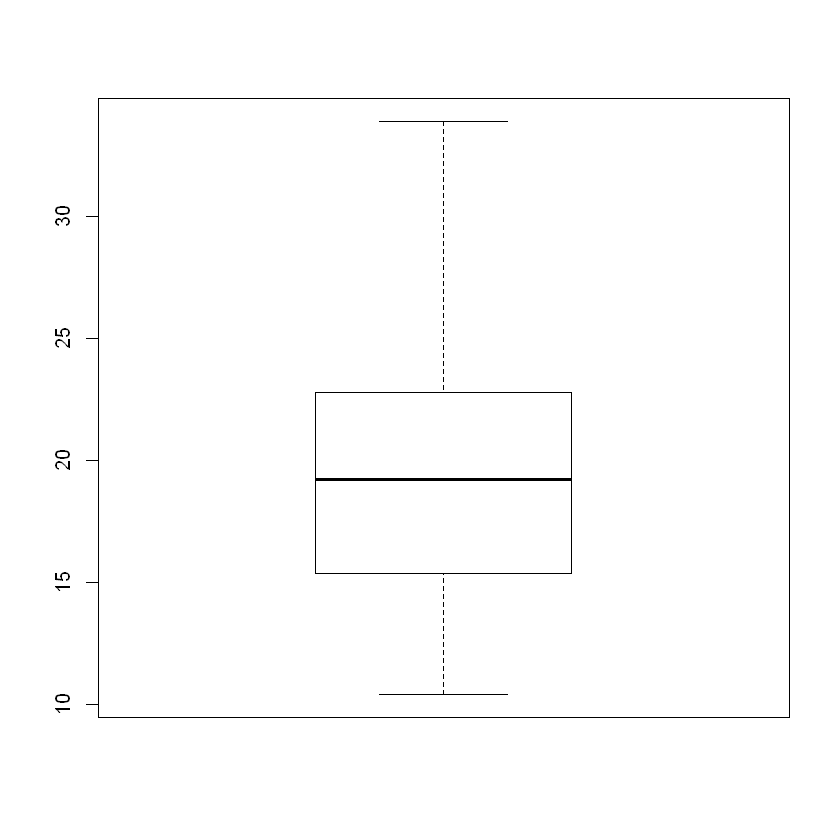

In [7]:
#mpg 이상치
boxplot(df$mpg)

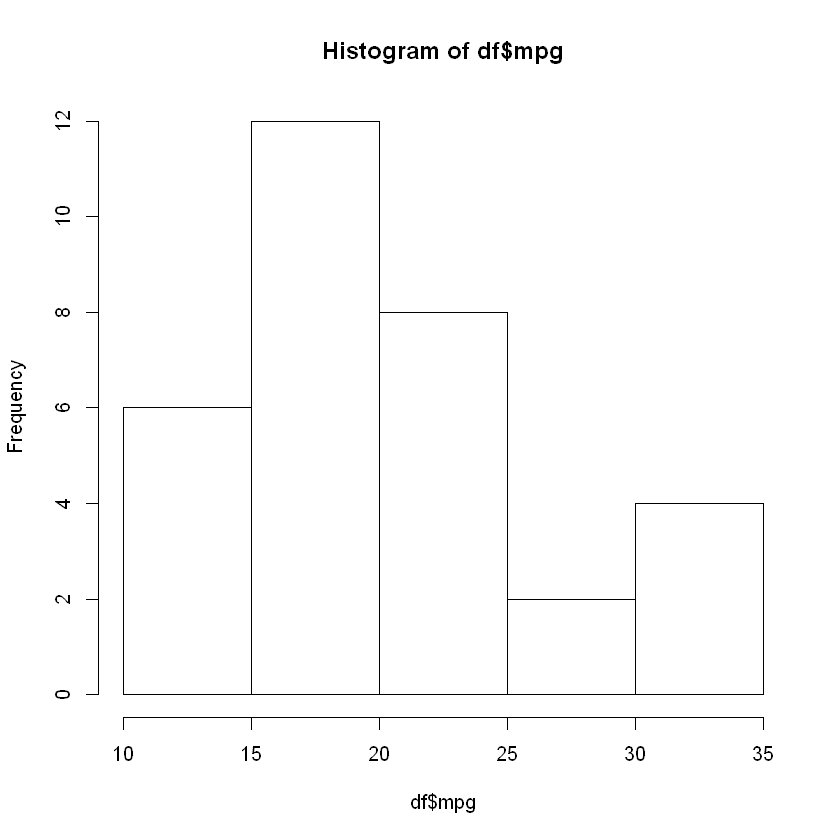

In [9]:
#히스토그램
hist(df$mpg)

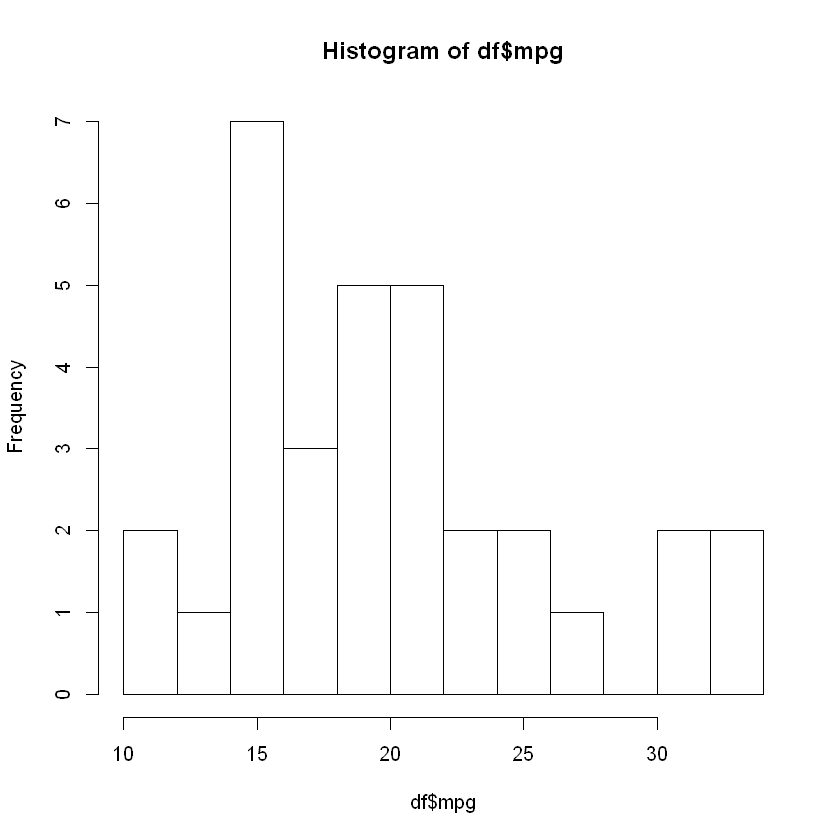

In [10]:
hist(df$mpg, breaks = 10)

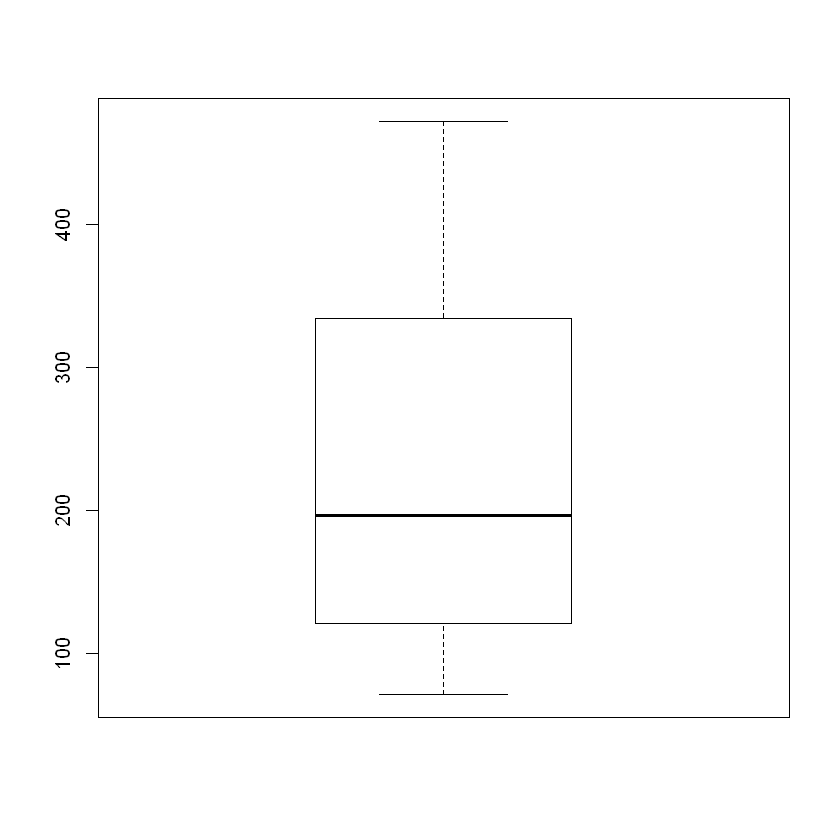

In [11]:
boxplot(df$disp)

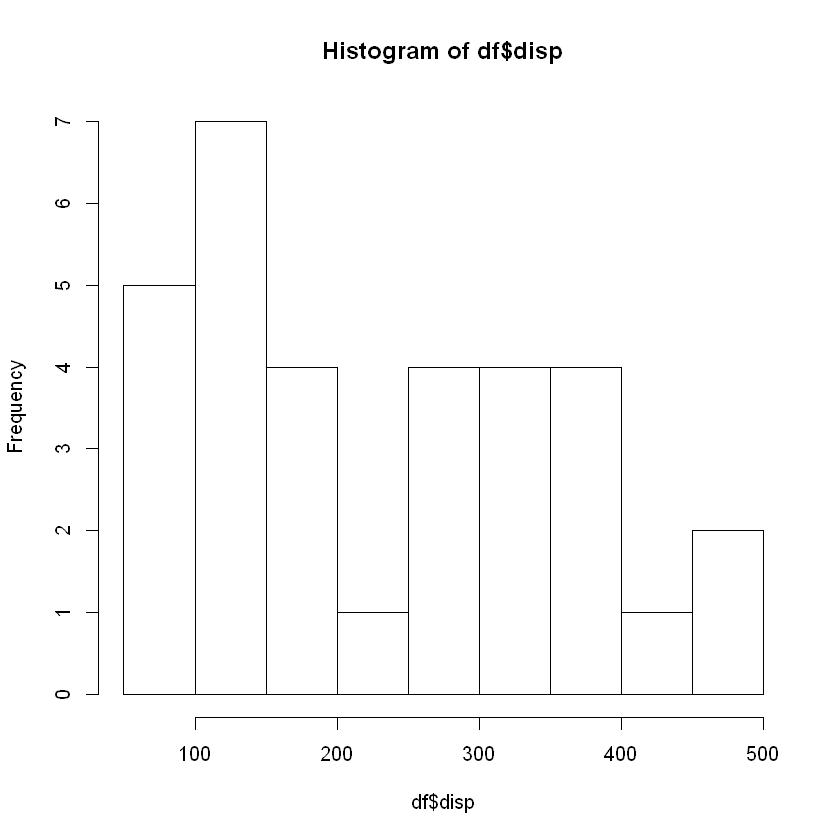

In [12]:
hist(df$disp)

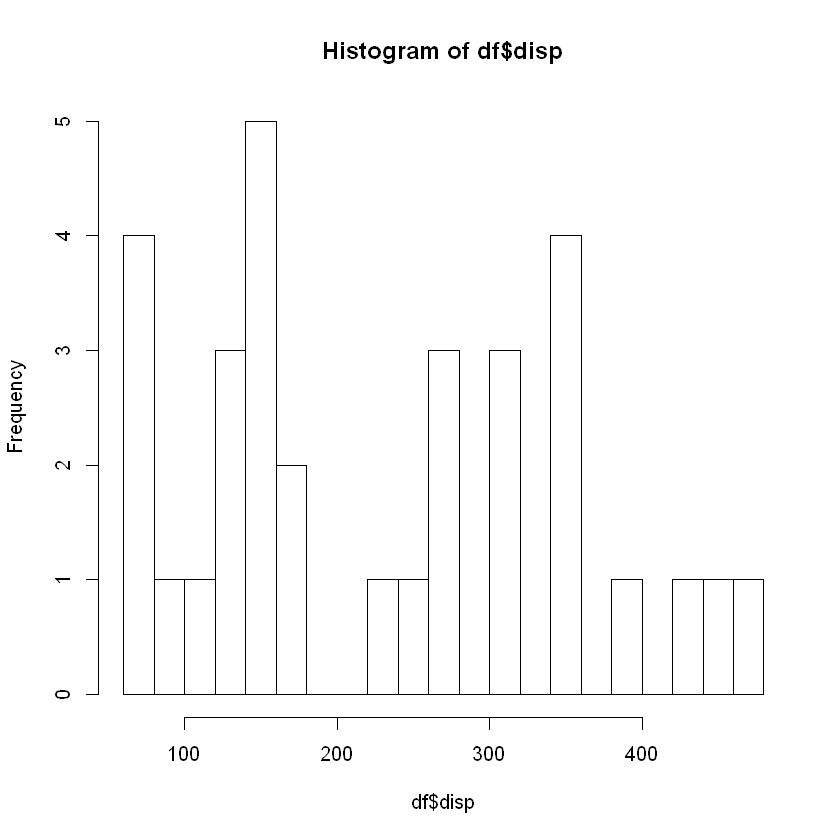

In [13]:
hist(df$disp, breaks = 20)

### 다이몬드 데이터 분석하기 - 가격에 영향을 미치는 것은 ?

#### DataSet : diamonds
- 캐럿, 가격, 컷팅방법, 컬러등 다이아몬드 정보

In [14]:
library('ggplot2')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [15]:
df <- diamonds
str(df)

tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [16]:
head(df)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [17]:
#sample 임의로 300개 추출
Sample <- df[sample(nrow(df), 300),]
attach(Sample)

In [18]:
str(Sample)

tibble [300 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:300] 1.53 0.9 0.7 1.51 1.02 0.51 1.17 2.07 0.3 0.33 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 3 5 3 5 5 5 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 6 7 1 5 3 2 5 4 2 6 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 5 3 5 5 3 4 2 2 4 4 ...
 $ depth  : num [1:300] 60.2 62.8 62.9 62.6 62.2 60.4 62.3 62 66.7 61 ...
 $ table  : num [1:300] 60 59 60 56 56 57 57 55 59 61 ...
 $ price  : int [1:300] 10171 2871 3231 11580 5222 1656 5111 17095 630 463 ...
 $ x      : num [1:300] 7.51 6.13 5.57 7.28 6.39 5.15 6.78 8.23 4.23 4.43 ...
 $ y      : num [1:300] 7.48 6.03 5.62 7.32 6.43 5.18 6.74 8.13 4.05 4.46 ...
 $ z      : num [1:300] 4.51 3.82 3.52 4.57 3.99 3.12 4.21 5.07 2.78 2.71 ...


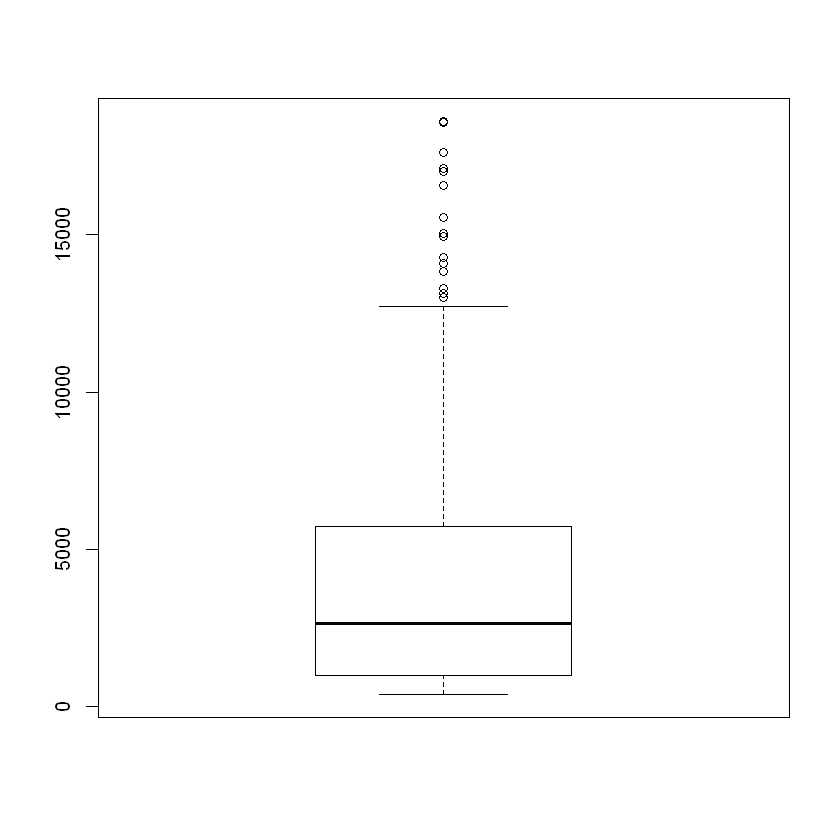

In [19]:
#가격 분석
boxplot(price)

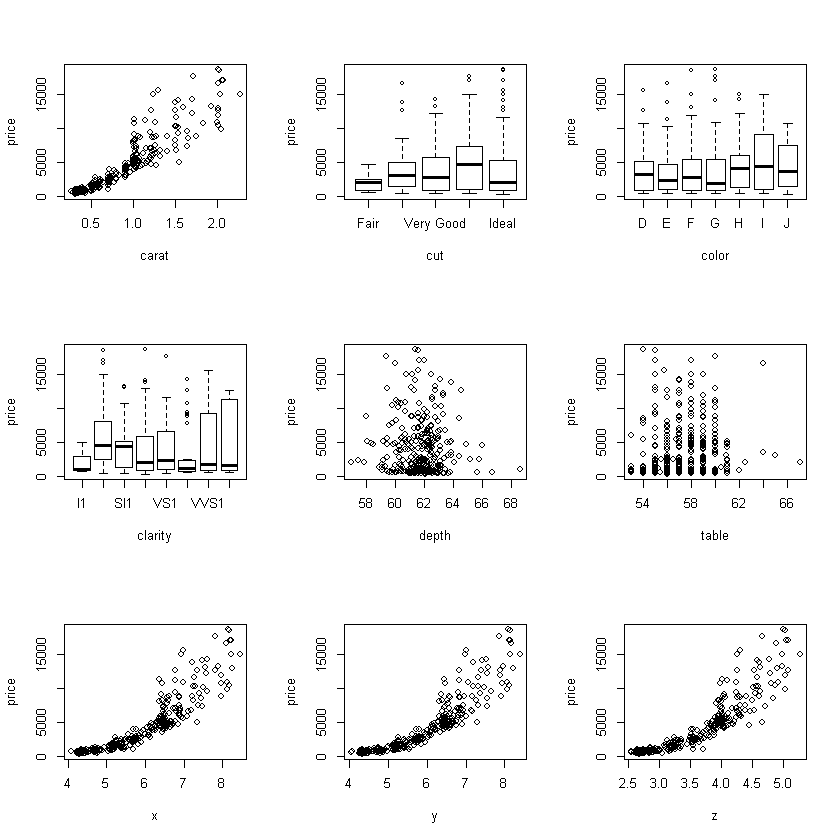

In [20]:
# 가격 이상치 - EDA로 원인 찾기
# price 와 관련된 그래프 그리기
par(mfrow = c(3,3))
plot(data = Sample, price ~.)

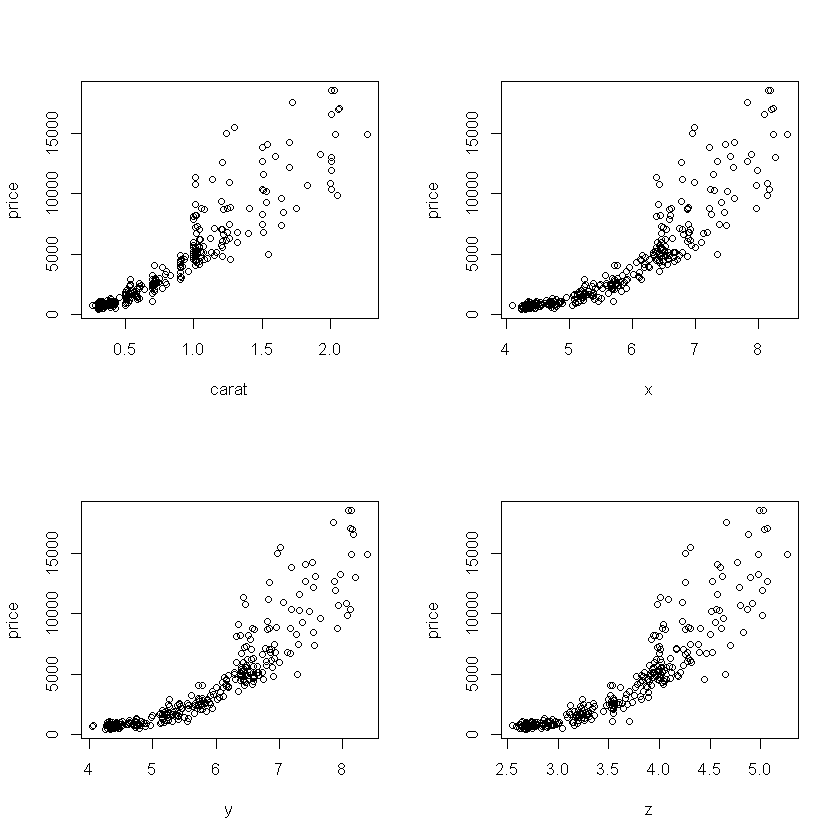

In [21]:
# price 에 carat, x, y, z 등이 영항이 있어 보임
par(mfrow = c(2,2))
plot(price ~ carat + x + y + z)

In [22]:
# 상관 계수 구하기
Sample2 <- data.frame(price, carat, x, y, z)
cor(Sample2)

,price,carat,x,y,z
price,1.0000000,0.9190771,0.8906122,0.8908427,0.8856253
carat,0.9190771,1.0000000,0.9807318,0.9795063,0.9794524
x,0.8906122,0.9807318,1.0000000,0.9988087,0.9918909
y,0.8908427,0.9795063,0.9988087,1.0000000,0.9916049
z,0.8856253,0.9794524,0.9918909,0.9916049,1.0000000


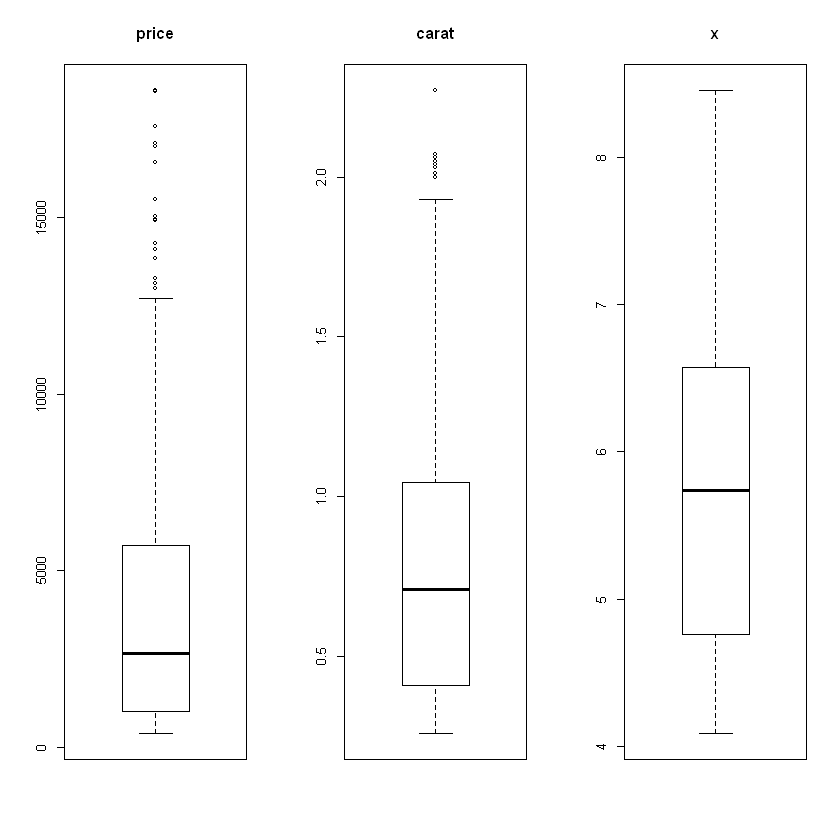

In [23]:
# price, carat, x 특징 파악
par(mfrow = c(1,3))
boxplot(price, main='price')
boxplot(carat, main='carat')
boxplot(x, main='x')

#### price, carat 에 이상치가 많음 => carat 이 price에 이상치가 생기도록 영향을 미쳤을 수 있음


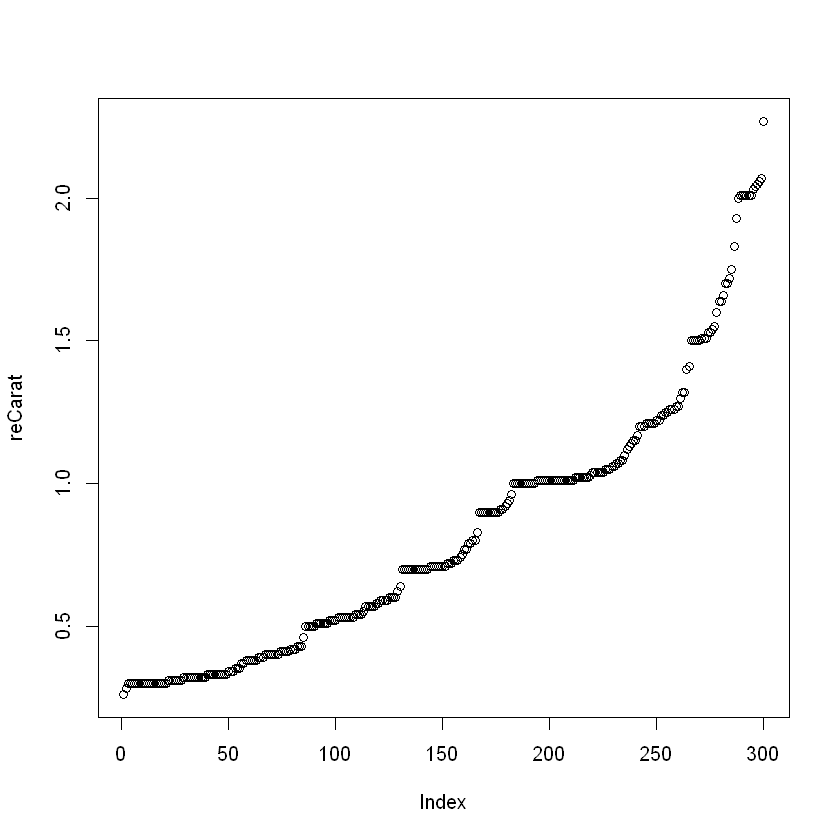

In [24]:
# carat 오름차순 정렬
reCarat <- carat[order(carat)]
par(mfrow = c(1,1))
plot(reCarat)

- carat 이 2차 함수와 비슷
- carat 이 올라갈수록 값이 급격히 커짐
- 이런 성향 때문에 이상치 발생 예상

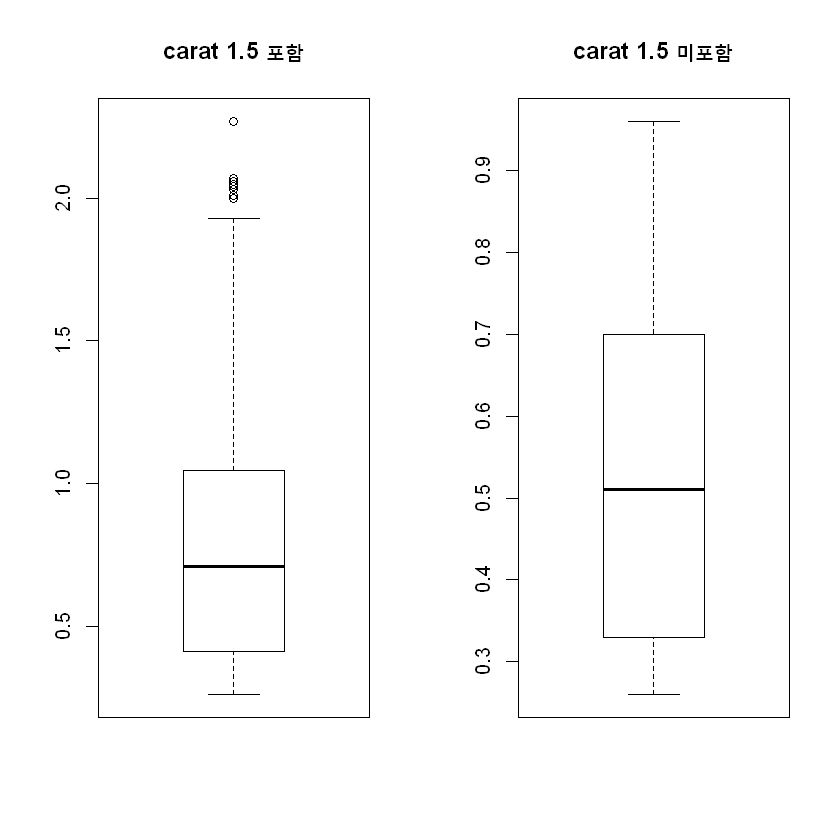

In [29]:
# carat 값 급격히 커지는 부분 제거
Sample2 <- subset(Sample, subset = (Sample$carat <1.0))
par(mfrow = c(1,2))
boxplot(Sample$carat, main='carat 1.5 포함')
boxplot(Sample2$carat, main='carat 1.5 미포함')

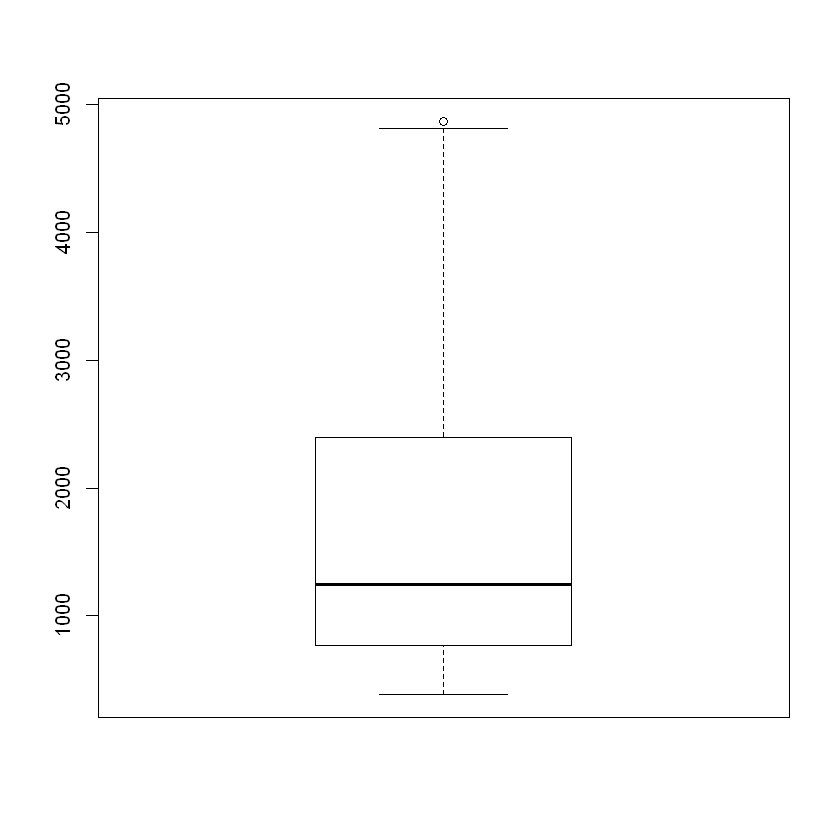

In [30]:
boxplot(Sample2$price)

In [31]:
library("ggplot2")
library("ggthemes")

Warning message:
"package 'ggthemes' was built under R version 3.6.3"

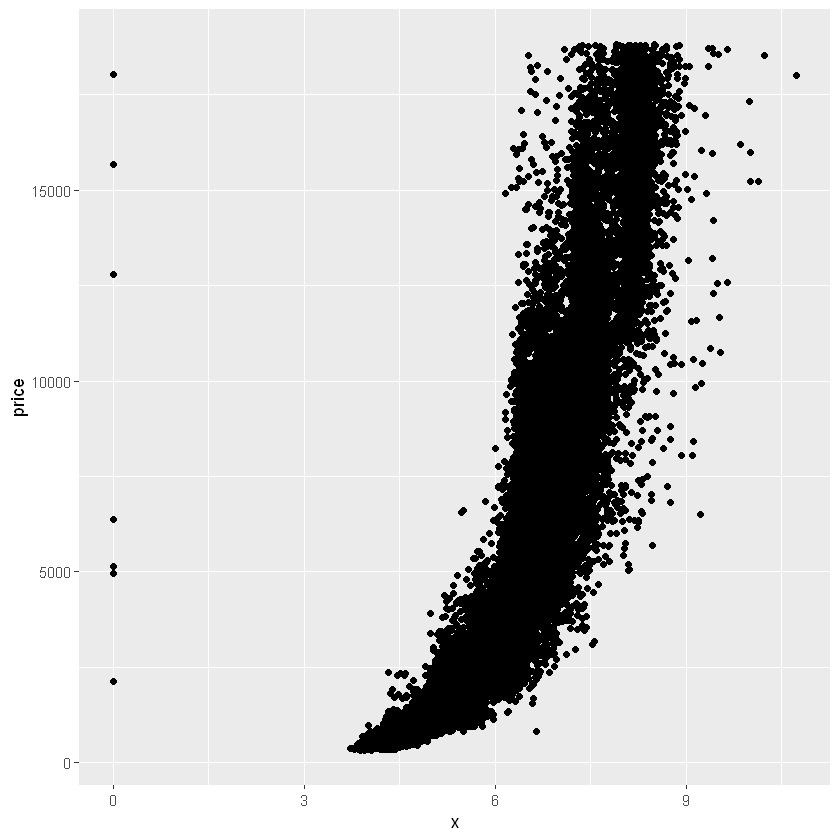

In [32]:
ggplot(diamonds, aes(x=x, y=price)) + geom_point()

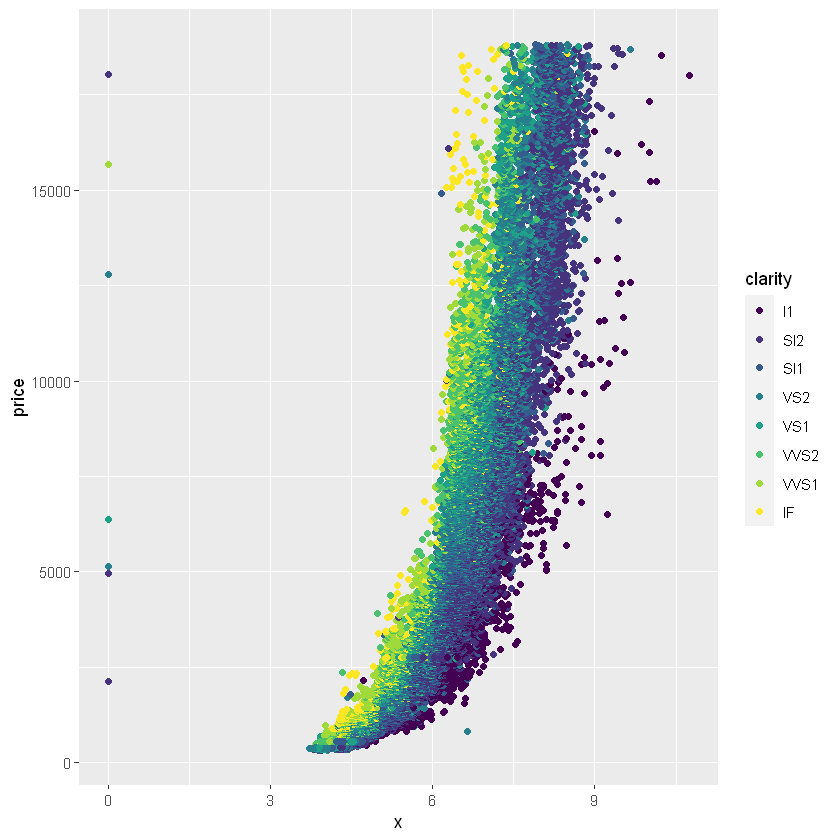

In [33]:
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point()

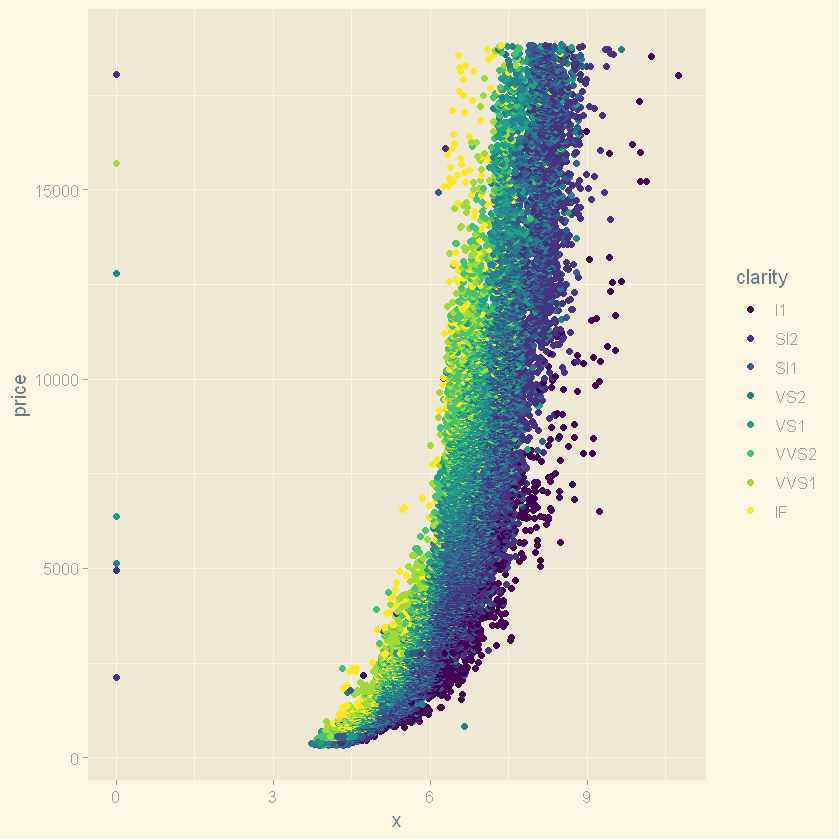

In [34]:
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point() + 
theme_solarized_2()

List of 93
 $ line                      :List of 6
  ..$ colour       : Named chr "#93a1a1"
  .. ..- attr(*, "names")= chr "rebase01"
  ..$ size         : num 0.545
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : Named chr "#fdf6e3"
  .. ..- attr(*, "names")= chr "rebase03"
  ..$ colour       : logi NA
  ..$ size         : num 0.545
  ..$ linetype     : num 1
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : Named chr "#93a1a1"
  .. ..- attr(*, "names")= chr "rebase01"
  ..$ size         : num 12
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'mar

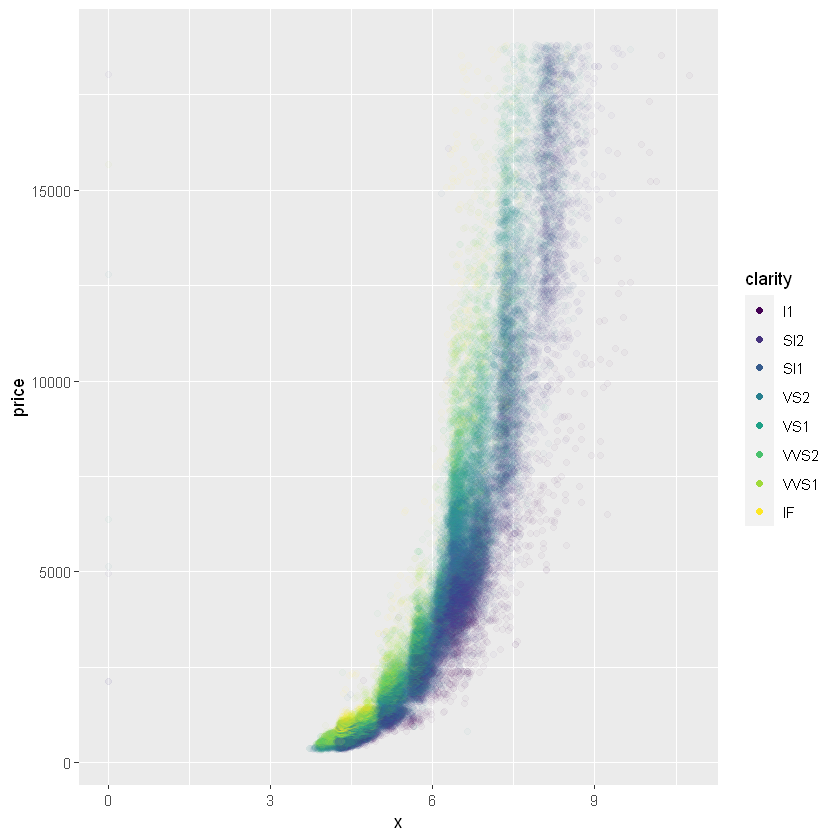

In [37]:
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point(alpha = 0.03) + 
guides(colour = guide_legend(override.aes = list(alpha = 1)))
theme_solarized_2()

Warning message:
"Removed 50 rows containing missing values (geom_point)."

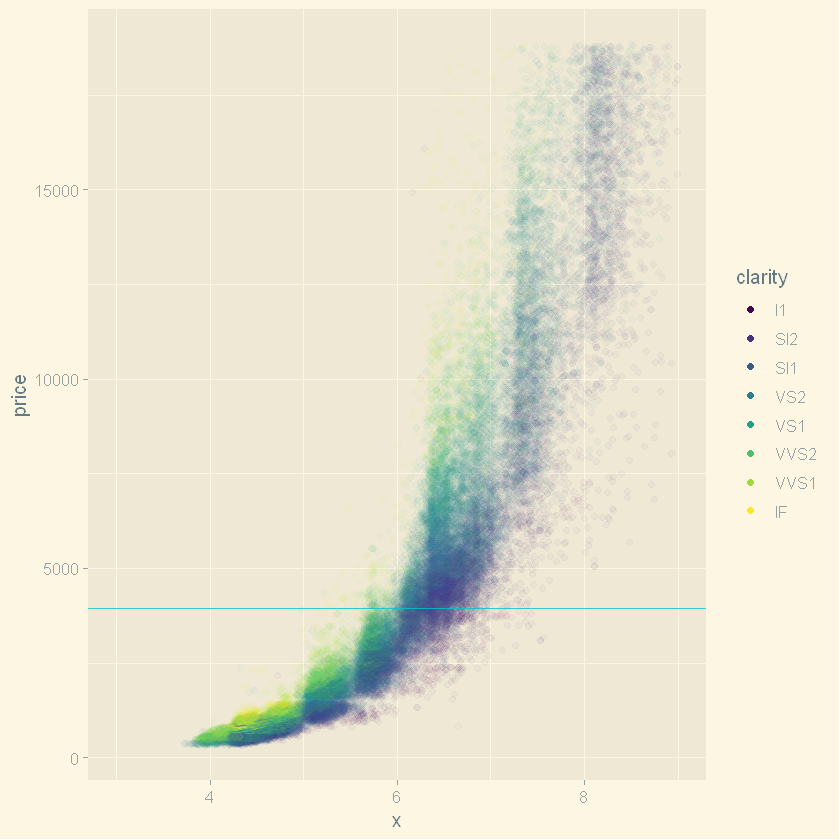

In [38]:
# x축 범위 조절(3~9), 수평선으로 평균 표시 geom_hline()
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) +
geom_point(alpha=0.03) +
geom_hline(yintercept=mean(diamonds$price), color="turquoise3", alpha=.8) + 
guides(colour = guide_legend(override.aes = list(alpha = 1))) +
xlim(3,9) +
theme_solarized_2()

### 시계열데이터 라인 그래프로 나타내기

In [39]:
ts <- read.csv('r-ggagi-data/example_ts.csv')
str(ts)
head(ts)

'data.frame':	24 obs. of  2 variables:
 $ Date : num  2014 2014 2014 2014 2014 ...
 $ Sales: int  2000 2300 2400 2500 2800 3100 2900 3000 3300 3400 ...


Date,Sales
2014.01,2000
2014.02,2300
2014.03,2400
2014.04,2500
2014.05,2800
2014.06,3100


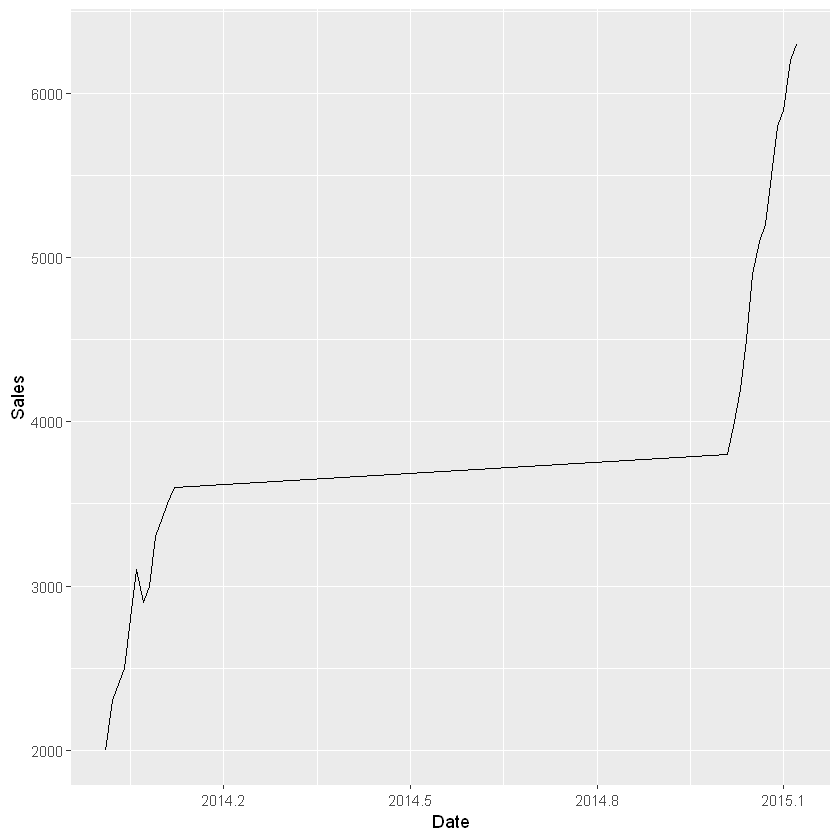

In [42]:
ggplot(ts, aes(x=Date, y=Sales)) + geom_line()

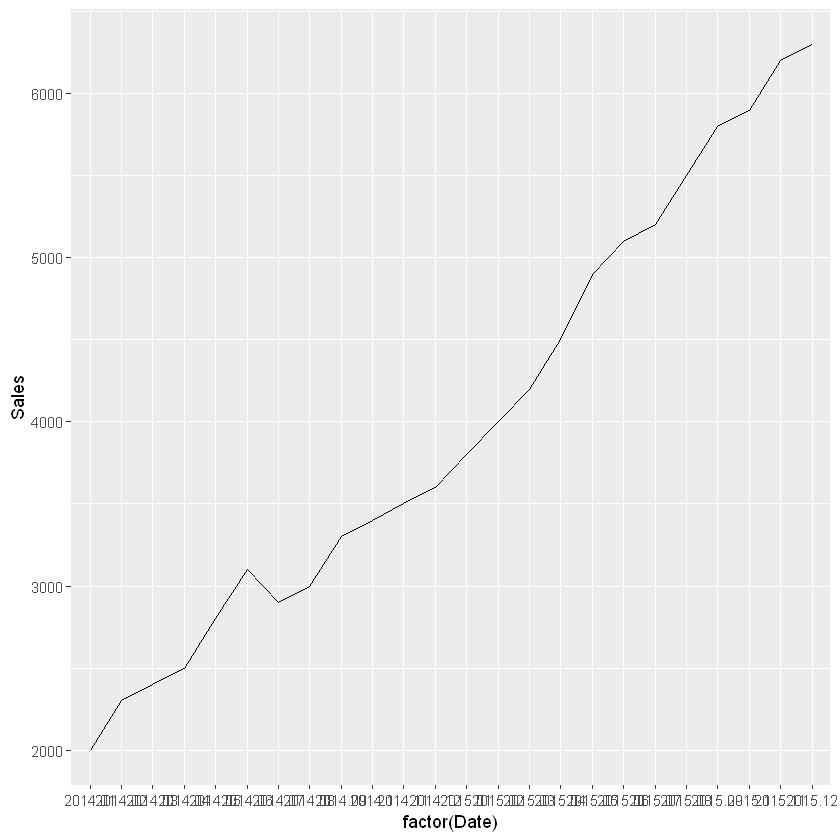

In [44]:
# x축에 날짜 모두 표시하기 - factor(), group=1 하나의 라인으로 연속 그릴 때 
ggplot(ts, aes(x=factor(Date), y=Sales, group=1)) + geom_line()

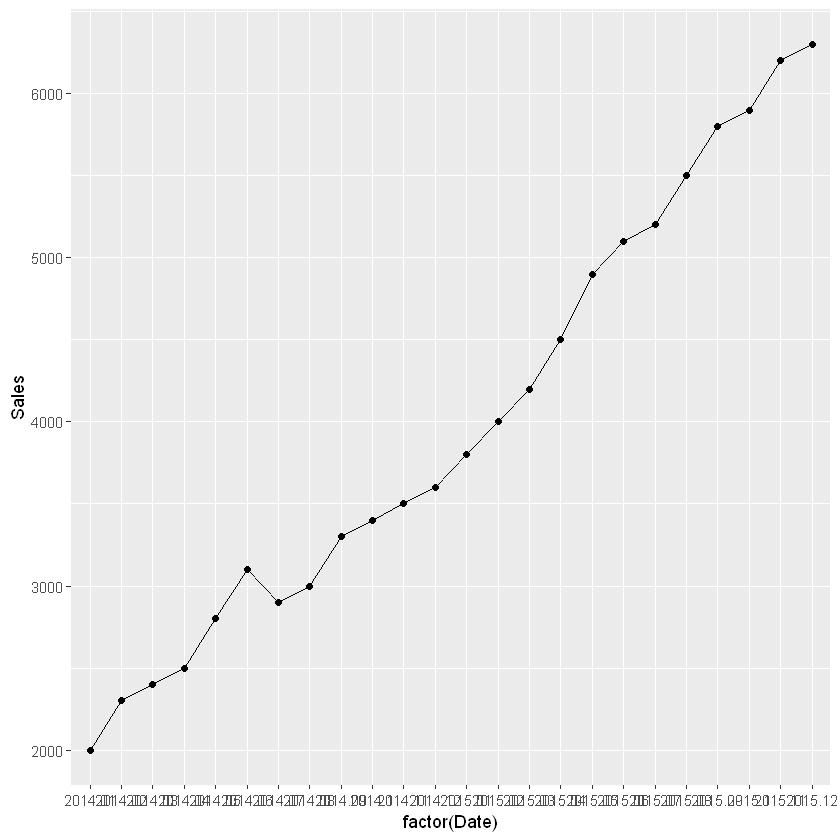

In [46]:
# 점 추가 geom_point()
ggplot(ts, aes(x=factor(Date), y=Sales, group=1)) + geom_line() + geom_point()

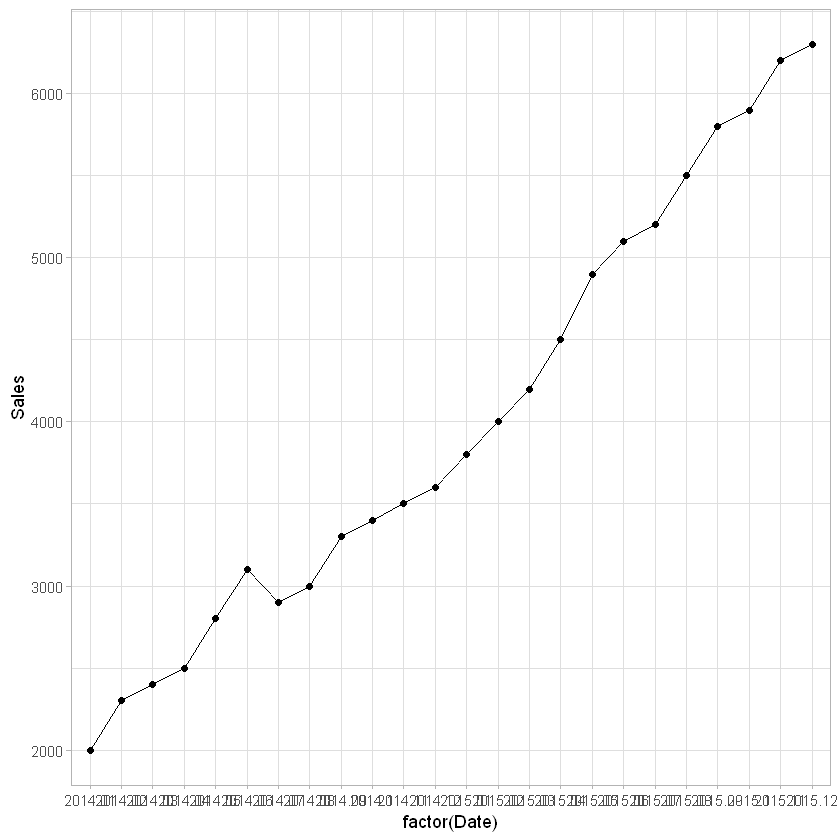

In [47]:
ggplot(ts, aes(x=factor(Date), y=Sales, group=1)) + geom_line() + geom_point() + theme_light()

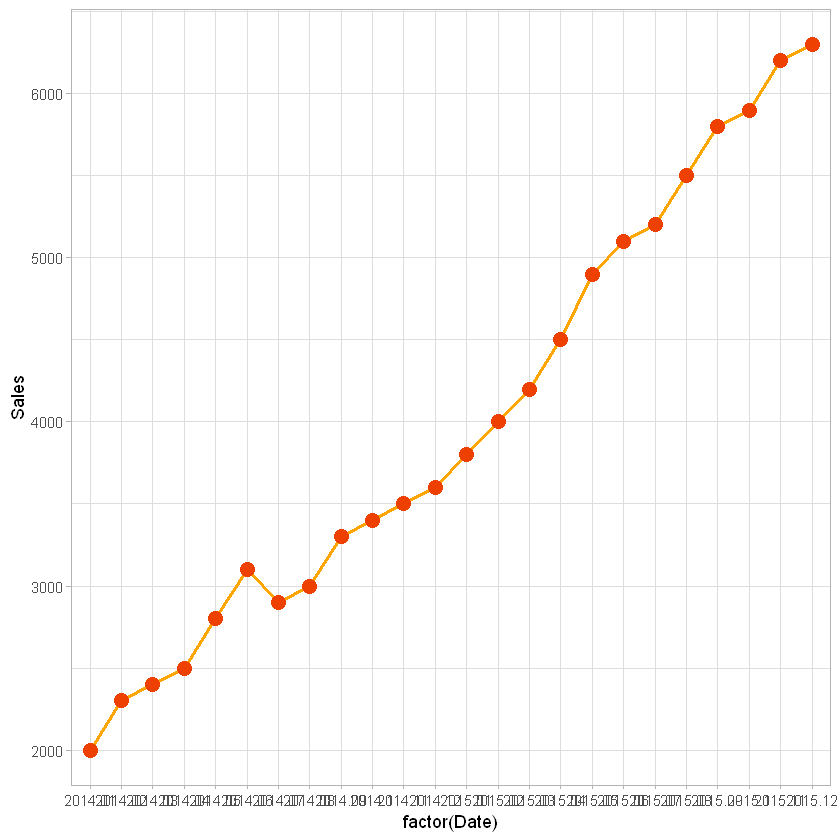

In [48]:
ggplot(ts, aes(x=factor(Date), y=Sales, group=1)) + 
geom_line(colour="orange1", size=1) + 
geom_point(colour="orangered2", size=4) + 
theme_light()

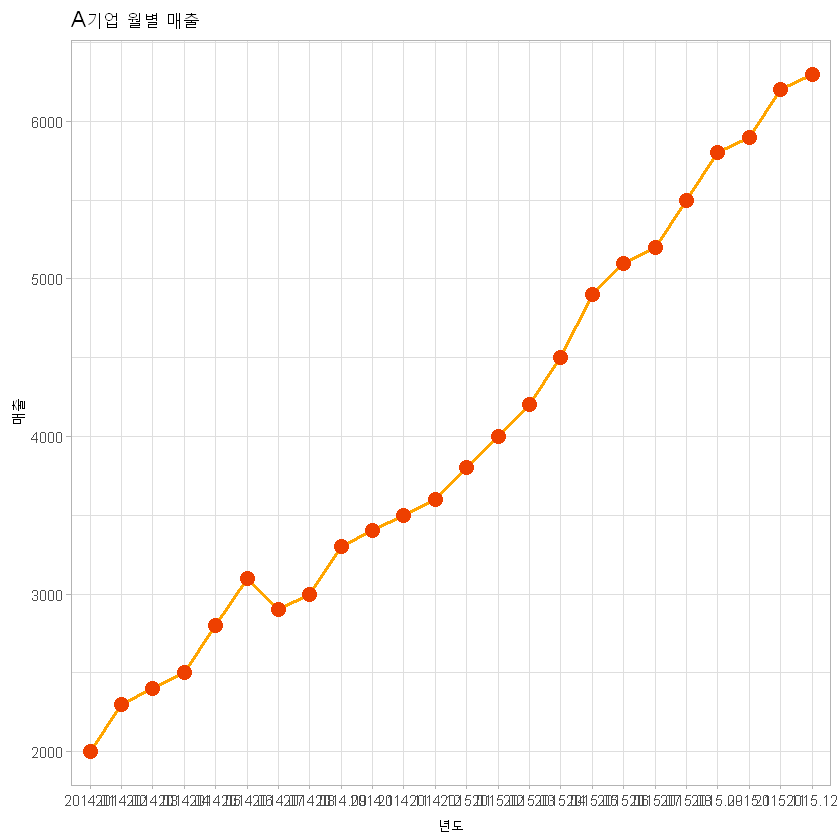

In [49]:
# title, x, y 축 이름 추가
ggplot(ts, aes(x=factor(Date), y=Sales, group=1)) +
geom_line(colour="orange1", size=1) + 
geom_point(colour="orangered2", size=4) + 
xlab("년도")+ ylab("매출") + ggtitle("A기업 월별 매출") + 
theme_light()

In [50]:
install.packages('dplyr')

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\205\.conda\envs\r_study\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll를 C:\Users\205\.conda\envs\r_study\Lib\R\library\dplyr\libs\x64\dplyr.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\205\AppData\Local\Temp\Rtmp4sbYrL\downloaded_packages


In [1]:
library("dplyr")
library("ggplot2")
library("ggthemes")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggthemes' was built under R version 3.6.3"

In [2]:
df <- read.csv('r-ggagi-data/example_population_f.csv')
str(df)
head(df)

'data.frame':	263 obs. of  9 variables:
 $ X         : int  2 3 4 5 6 7 8 9 10 11 ...
 $ Provinces : Factor w/ 16 levels "강원도","경기도",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ City      : Factor w/ 240 levels "가평군 ","강남구 ",..: 187 188 157 104 31 64 189 105 5 62 ...
 $ Population: int  155695 126817 235186 298145 362197 362604 417976 464176 333523 353284 ...
 $ Households: int  72882 59614 108138 126915 158769 160110 177077 192670 141325 137260 ...
 $ PersInHou : num  2.14 2.13 2.17 2.35 2.28 2.26 2.36 2.41 2.36 2.57 ...
 $ Male      : int  76962 63292 114119 148265 177946 181825 208657 227676 164304 174075 ...
 $ Female    : int  78733 63525 121067 149880 184251 180779 209319 236500 169219 179209 ...
 $ SexRatio  : num  0.98 1 0.94 0.99 0.97 1.01 1 0.96 0.97 0.97 ...


X,Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
2,서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
3,서울특별시,중구,126817,59614,2.13,63292,63525,1.00
4,서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
5,서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
6,서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
7,서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [3]:
df <- df[,-1]

In [4]:
df <- tbl_df(df)

In [5]:
head(df)

Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [6]:
df2 <- filter(df, Provinces=="충청북도"|Provinces=="충청남도")
head(df2)

Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
충청북도,청주시,832387,334276,2.49,417505,414882,1.01
충청북도,청주시 상당구,178536,70873,2.52,89037,89499,0.99
충청북도,청주시 서원구,222817,88212,2.53,110729,112088,0.99
충청북도,청주시 흥덕구,251652,101572,2.48,126533,125119,1.01
충청북도,청주시 청원구,179382,73619,2.44,91206,88176,1.03
충청북도,충주시,208173,87078,2.39,104828,103345,1.01


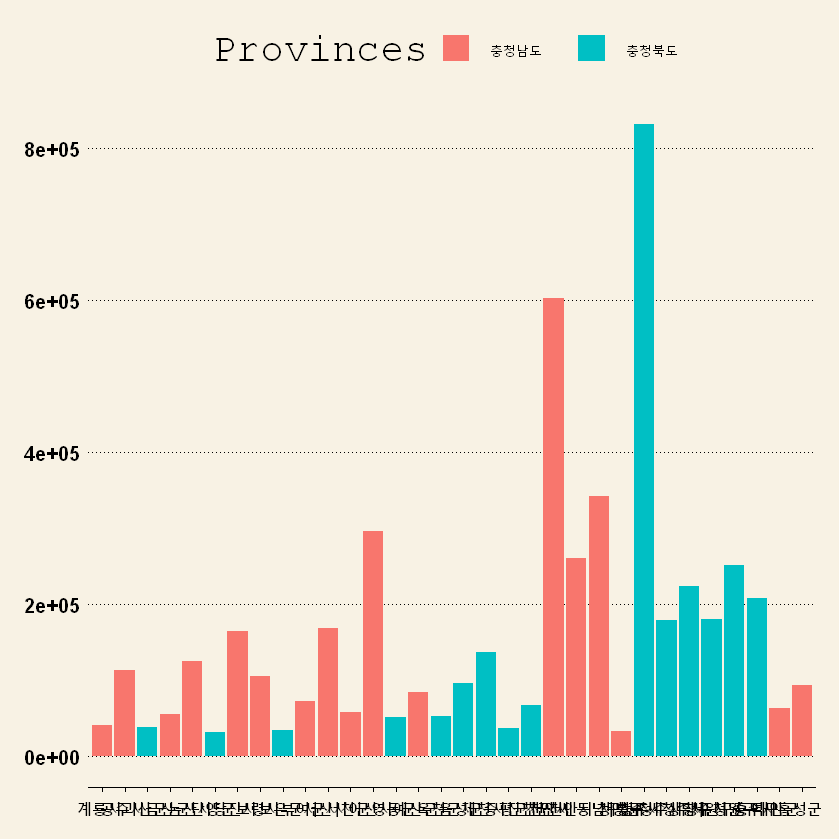

In [7]:
Graph <- ggplot(df2, aes(x=City, y=Population, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
Graph

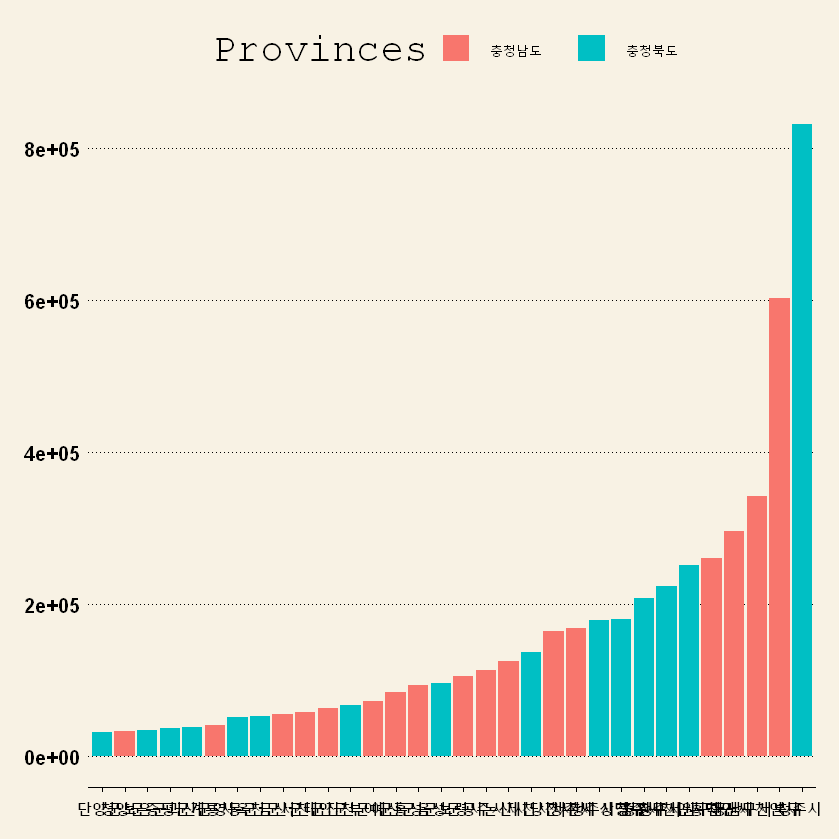

In [8]:
GraphReorder <- ggplot(df2, aes(x=reorder(City, Population), y=Population, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
GraphReorder

In [10]:
# 남자비율이 높고 1인가구가 많은 도시
df3 <- filter(df, SexRatio > 1, PersInHou < 2)
df3

Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
인천광역시,옹진군,20825,11172,1.86,11715,9110,1.29
강원도,화천군,26790,13433,1.99,14989,11801,1.27
강원도,고성군,30066,15485,1.94,16109,13957,1.15
충청북도,괴산군,38027,19145,1.99,19309,18718,1.03
전라남도,신안군,43566,22248,1.96,22899,20667,1.11
경상북도,울릉군,10304,5365,1.92,5518,4786,1.15


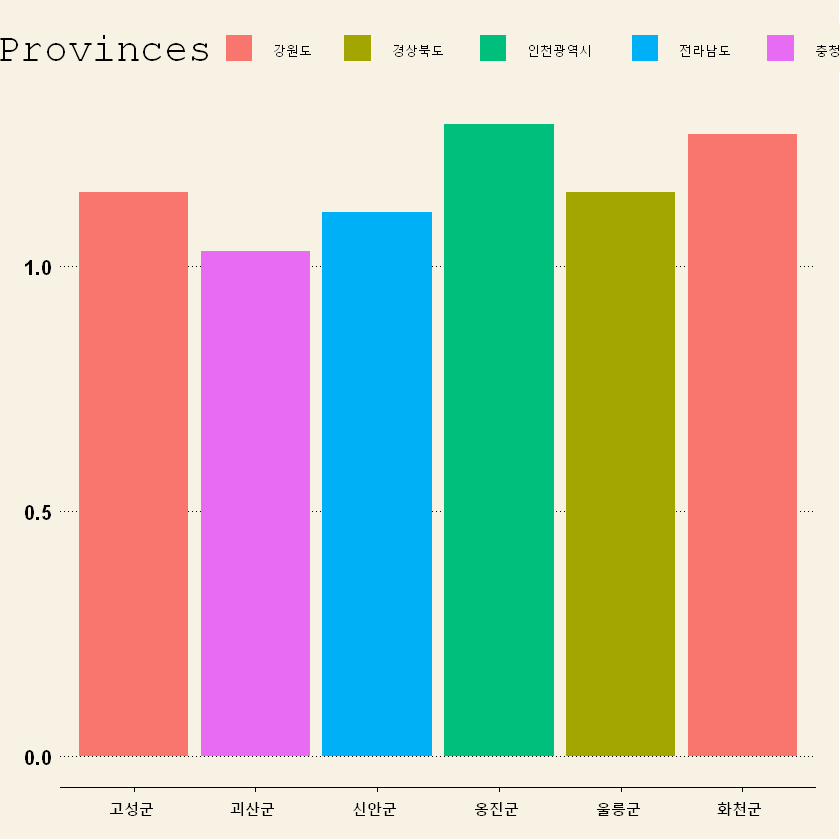

In [11]:
Graph <- ggplot(df3, aes(x=City, y=SexRatio, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
Graph

In [15]:
df <- mutate(df, 
             SexF = ifelse(SexRatio < 1, "여자비율높음", 
                           ifelse(SexRatio > 1, "남자비율높음", "남여비율같음")))
head(df)

Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio,SexF
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98,여자비율높음
서울특별시,중구,126817,59614,2.13,63292,63525,1.00,남여비율같음
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94,여자비율높음
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99,여자비율높음
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97,여자비율높음
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01,남자비율높음
